<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/Clustering1_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
## 1. My first clustering with K-means

Here we start to explore the exciting world of clustering of data. To do so, we will follow a very common strategy. We will create synthetic data that we completely control, and use them to understand what the clustering algorithm is actually doing, and identify its limiations.

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=2, n_samples=200, random_state=0, cluster_std=0.3)
print(X[:10],y[:10])

[[2.28526648 1.00455151]
 [1.93543281 1.00868043]
 [2.37582034 0.76164792]
 [1.86403641 0.77848212]
 [1.43610384 4.74459496]
 [0.77453194 4.19592138]
 [1.01948315 4.74006938]
 [0.70993435 3.70954839]
 [2.01540335 0.8083264 ]
 [0.48721057 4.442622  ]] [1 1 1 1 0 0 0 0 1 0]


Q1. Plot these data sets. What do centers and cluster_std control? 

Now produce a data set with 4 clusters. 

The scikit-learn library has an implementation of the k-means algorithm. Let's apply it to a set of randomly generated blobs, whose labels we throw away.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[0.77480183 4.37068268]
 [1.86332135 1.0208548 ]
 [1.28833869 4.28979518]
 [2.17026982 0.68626564]]


Q2. What does the argument of KMeans control?

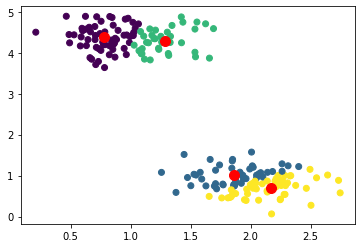

In [ ]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

The clustering looks more or less correct. To get a more quantitative measure of success we can get the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.565


Q3. Does this accuracy score make sense to you? If not, what has possibly gotten wrong? Why is the function below fixing the problem? Use it to get the right accuracy score.

In [ ]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [ ]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 1.0


Q4. Check how the accuracy score depends on the cluster_std parameter. Repeat the clustering at increasing values of <b> cluster_std </b>.

Q5. What happens if you initialize K-means with a wrong number of clusters hyper-parameter?

Let's change our data type.

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

Q6. Plot the data. What is the main difference with the previous data type?

Q7. Identify the clusters by using K-means.

Let's try a different clustering technique: DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)


Q8. Cluster the preivous data structure with DBSCAN.

Q9. Do you still have to prescribe the number of clusters? 

## 2. Clustering digits with K-means

Using scikit-learn we can download a set of 1797 images of handwritten digits with the correct labels 0,1,...,9. The images have quite a low resolution: 8*8=64 pixels. Let's see how our machine learning method works with this kind of data.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Q9b. Use the pyplot function imshow to plot the first 10 entries. 

Q10. Cluster the pictures of the digits using K-means, visualize the cluster centers, and calculate the accuracy of the clustering. 

Notebook based on:

https://colab.research.google.com/github/csmastersUH/data_analysis_with_python_spring_2020/blob/master/clustering.ipynb#scrollTo=blpDjoE_FOuu